In [3]:
#This notebook performs Step 1 of the RNN training process: time-warping the single letter data so that it
#can be used to initialize the data-labeling HMM. Running this notebook will (slowly) time-warp all 10 sessions
#and save the results in Step1_TimeWarping folder.

#To run this notebook, you'll need the time warped PCA python package (https://github.com/ganguli-lab/twpca).

In [4]:
# import tensorflow as tf

# #suppress all tensorflow warnings (largely related to compatability with v2)
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import os
import numpy as np
import scipy.io
import scipy.ndimage.filters
import matplotlib.pyplot as plt
# from twpca import TWPCA
# from twpca.regularizers import curvature
from characterDefinitions import getHandwritingCharacterDefinitions

#point this towards the top level dataset directory
rootDir = os.path.expanduser('~') + '/handwritingBCIData/'

#this line ensures that tensorflow will only use GPU 0 (keeps it from taking over all the GPUs in a multi-gpu setup)
os.environ["CUDA_VISIBLE_DEVICES"]='0'

#defines all the sessions that will be time-warped
dataDirs = ['t5.2019.05.08','t5.2019.11.25','t5.2019.12.09','t5.2019.12.11','t5.2019.12.18',
            't5.2019.12.20','t5.2020.01.06','t5.2020.01.08','t5.2020.01.13','t5.2020.01.15']

#defines the list of all 31 characters and what to call them
charDef = getHandwritingCharacterDefinitions()

# #saves all time-warped data in this folder
# if not os.path.isdir(rootDir + 'RNNTrainingSteps/Step1_TimeWarping'):
#     os.mkdir(rootDir + 'RNNTrainingSteps/Step1_TimeWarping')

In [5]:
def load_data(dir_load, fileName_load, path_load=None):
    from pathlib import Path
    import scipy.io
    if path_load is None:
        dir_load = Path(dir_load).resolve()
        fileName_load = fileName_load
        path_load = dir_load / fileName_load

    dat = scipy.io.loadmat(path_load)
    return dat

In [6]:
dat = load_data(dir_load=r'/media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.05.08',
               fileName_load=r'singleLetters.mat')

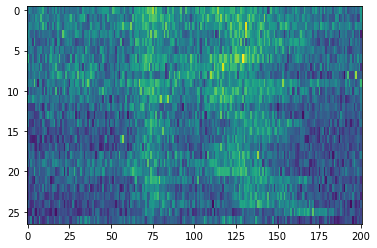

In [7]:
plt.figure()
# plt.imshow(np.mean(dat['neuralActivityCube_l'], axis=2), aspect='auto', interpolation='none')
plt.imshow(np.mean(dat['neuralActivityCube_g'], axis=2), aspect='auto', interpolation='none')

In [10]:
import sys
sys.path.append(r'/media/rich/Home_Linux_partition/github_repos/affinewarp')
from affinewarp import ShiftWarping, PiecewiseWarping

Warping dataset: t5.2019.05.08


Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  8.33it/s]

Warping character: a


Loss improvement: 0.36%: 100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


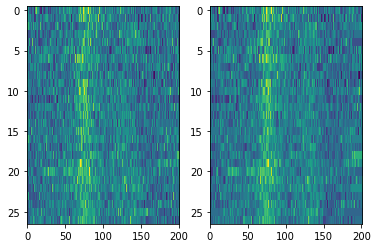

Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.76it/s]

Warping character: b


Loss improvement: 0.23%: 100%|██████████| 50/50 [00:05<00:00,  9.31it/s]


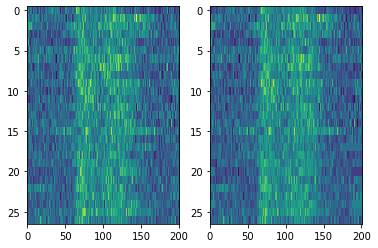

Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.85it/s]

Warping character: c


Loss improvement: 0.14%: 100%|██████████| 50/50 [00:05<00:00,  9.43it/s]


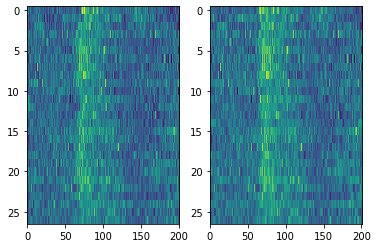

Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.32it/s]

Warping character: d


Loss improvement: 0.45%: 100%|██████████| 50/50 [00:05<00:00,  9.47it/s]


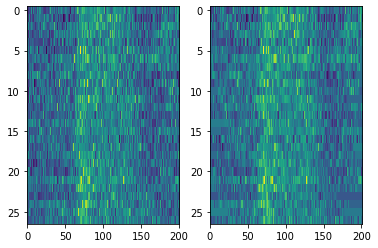

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.61it/s]

Warping character: e


Loss improvement: 0.38%: 100%|██████████| 50/50 [00:05<00:00,  9.27it/s]


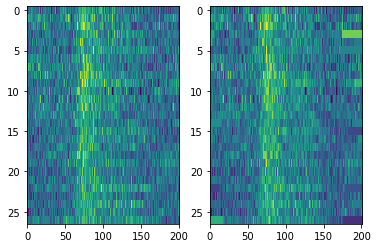

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.48it/s]

Warping character: f


Loss improvement: 0.25%: 100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


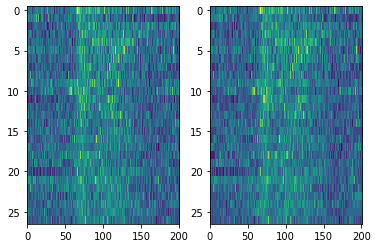

Loss improvement: 0.11%:   2%|▏         | 1/50 [00:00<00:04,  9.91it/s]

Warping character: g


Loss improvement: 0.73%: 100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


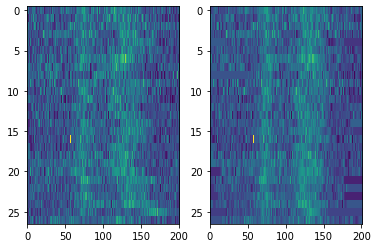

Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.82it/s]

Warping character: h


Loss improvement: 0.11%: 100%|██████████| 50/50 [00:05<00:00,  9.72it/s]


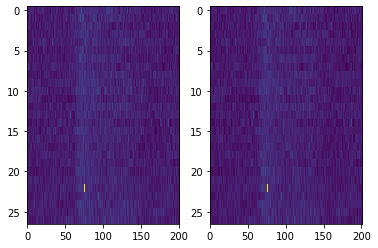

Loss improvement: 0.05%:   2%|▏         | 1/50 [00:00<00:05,  9.48it/s]

Warping character: i


Loss improvement: 0.28%: 100%|██████████| 50/50 [00:05<00:00,  9.57it/s]


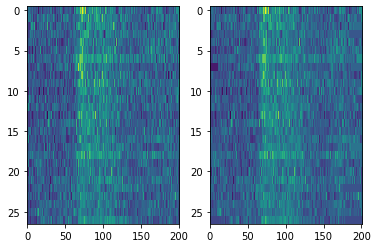

Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.66it/s]

Warping character: j


Loss improvement: 0.57%: 100%|██████████| 50/50 [00:05<00:00,  9.56it/s]


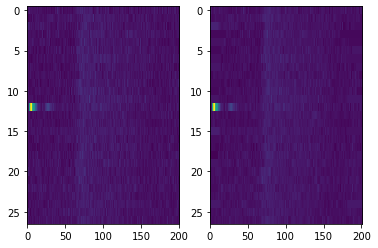

Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: k


Loss improvement: 0.47%: 100%|██████████| 50/50 [00:05<00:00,  9.51it/s]


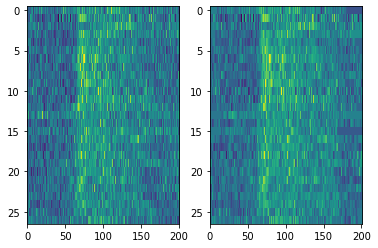

Loss improvement: -0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]

Warping character: l


Loss improvement: 0.05%: 100%|██████████| 50/50 [00:05<00:00,  9.54it/s]


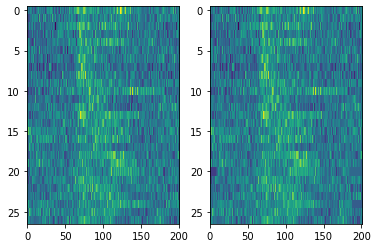

Loss improvement: 0.02%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: m


Loss improvement: 0.50%: 100%|██████████| 50/50 [00:05<00:00,  9.32it/s]


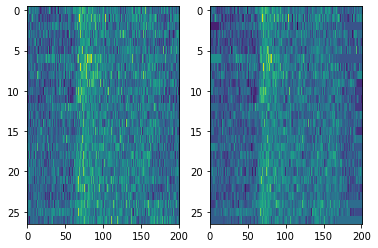

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.19it/s]

Warping character: n


Loss improvement: 0.19%: 100%|██████████| 50/50 [00:05<00:00,  9.52it/s]


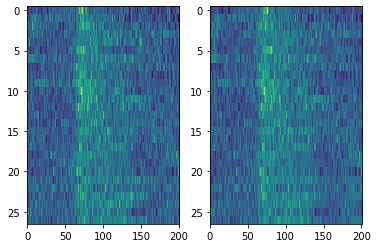

Loss improvement: 0.01%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


Loss improvement: 0.38%: 100%|██████████| 50/50 [00:05<00:00,  9.44it/s]


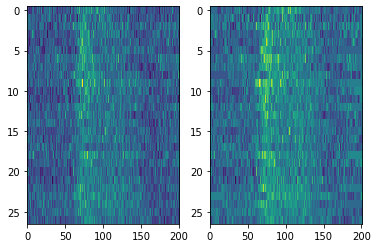

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.10it/s]

Warping character: p


Loss improvement: 0.43%: 100%|██████████| 50/50 [00:05<00:00,  9.36it/s]


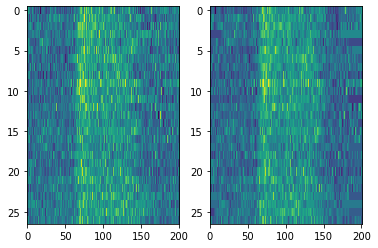

Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.52it/s]

Warping character: q


Loss improvement: 0.48%: 100%|██████████| 50/50 [00:05<00:00,  9.39it/s]


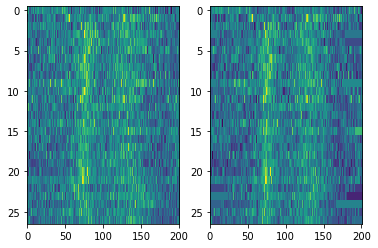

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  8.97it/s]

Warping character: r


Loss improvement: 0.14%: 100%|██████████| 50/50 [00:05<00:00,  9.37it/s]


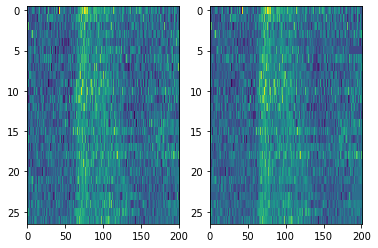

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.12it/s]

Warping character: s


Loss improvement: 0.43%: 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]


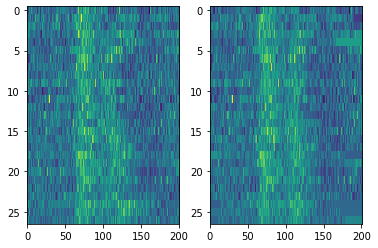

Loss improvement: 0.11%:   2%|▏         | 1/50 [00:00<00:05,  9.62it/s]

Warping character: t


Loss improvement: 0.30%: 100%|██████████| 50/50 [00:05<00:00,  9.21it/s]


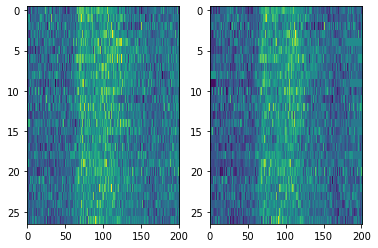

Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.86it/s]

Warping character: u


Loss improvement: 0.13%: 100%|██████████| 50/50 [00:05<00:00,  9.37it/s]


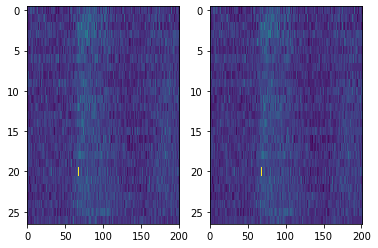

Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.76it/s]

Warping character: v


Loss improvement: 0.10%: 100%|██████████| 50/50 [00:05<00:00,  9.36it/s]


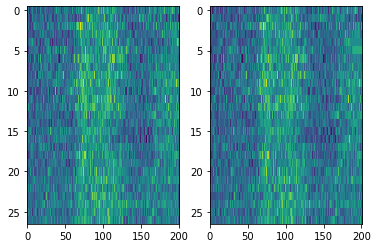

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]

Warping character: w


Loss improvement: 0.37%: 100%|██████████| 50/50 [00:05<00:00,  9.44it/s]


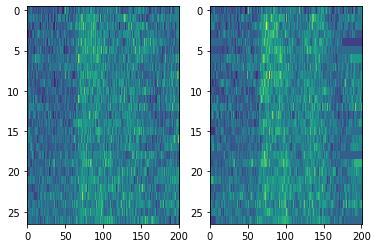

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.58it/s]

Warping character: x


Loss improvement: 0.37%: 100%|██████████| 50/50 [00:05<00:00,  9.61it/s]


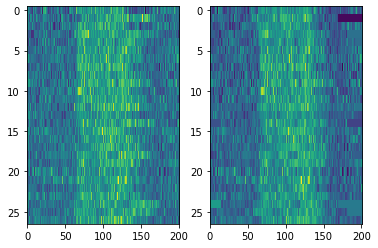

Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.49it/s]

Warping character: y


Loss improvement: 0.63%: 100%|██████████| 50/50 [00:05<00:00,  9.39it/s]


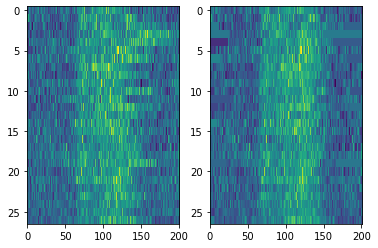

Loss improvement: 0.06%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: z


Loss improvement: 0.36%: 100%|██████████| 50/50 [00:05<00:00,  9.30it/s]


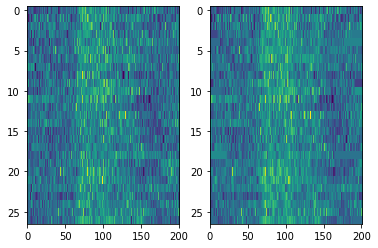

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:04,  9.88it/s]

Warping character: greaterThan


Loss improvement: 0.25%: 100%|██████████| 50/50 [00:05<00:00,  9.45it/s]


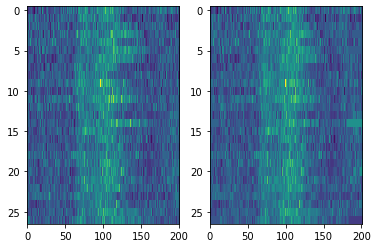

Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: comma


Loss improvement: 0.29%: 100%|██████████| 50/50 [00:05<00:00,  9.76it/s]


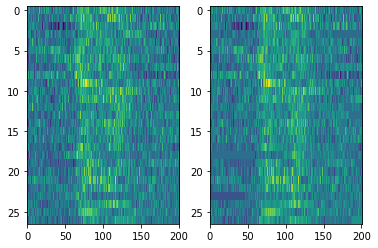

Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: apostrophe


Loss improvement: 0.65%: 100%|██████████| 50/50 [00:05<00:00,  9.52it/s]


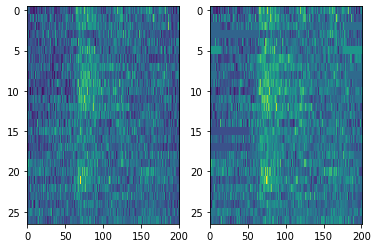

Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:04,  9.83it/s]

Warping character: tilde


Loss improvement: 0.20%: 100%|██████████| 50/50 [00:05<00:00,  9.55it/s]


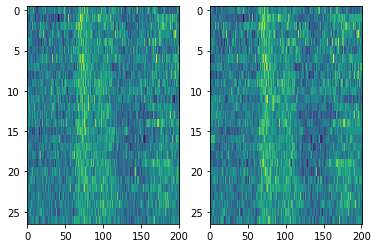

Loss improvement: 0.12%:   2%|▏         | 1/50 [00:00<00:05,  9.12it/s]

Warping character: questionMark


Loss improvement: 0.62%: 100%|██████████| 50/50 [00:05<00:00,  9.52it/s]


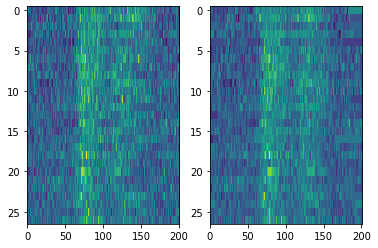

Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.05.08/t5.2019.05.08_warpedCubes.mat


  0%|          | 0/50 [00:00<?, ?it/s]

Warping dataset: t5.2019.11.25
Warping character: a


Loss improvement: 0.03%:   4%|▍         | 2/50 [00:00<00:02, 19.62it/s]

Warping character: b


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.08it/s]

Warping character: c


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.79it/s]

Warping character: d


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 14.21it/s]

Warping character: e


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:02, 19.56it/s]

Warping character: f


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.92it/s]

Warping character: g


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.18it/s]

Warping character: h


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.28it/s]

Warping character: i


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.26it/s]

Warping character: j


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: k


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: l


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.91it/s]

Warping character: m


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.38it/s]

Warping character: n


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.20it/s]

Warping character: r


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: t


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: u


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: v


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: w


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.94it/s]

Warping character: x


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: y


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: z


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: greaterThan


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: comma


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.29it/s]

Warping character: tilde


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.04it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:07<00:00,  6.73it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.11.25/t5.2019.11.25_warpedCubes.mat
Warping dataset: t5.2019.12.09


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: a


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.83it/s]

Warping character: b


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.52it/s]

Warping character: c


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.08it/s]

Warping character: d


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.02it/s]

Warping character: e


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.88it/s]

Warping character: f


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.46it/s]

Warping character: g


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.81it/s]

Warping character: h


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.53it/s]

Warping character: i


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.40it/s]

Warping character: j


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.05it/s]

Warping character: k


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.21it/s]

Warping character: l


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.20it/s]

Warping character: m


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.71it/s]

Warping character: n


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.48it/s]

Warping character: o


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.11it/s]

Warping character: r


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.78it/s]

Warping character: s


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: t


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.98it/s]

Warping character: u


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.63it/s]

Warping character: v


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.64it/s]

Warping character: w


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.81it/s]

Warping character: x


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.79it/s]

Warping character: y


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.39it/s]

Warping character: z


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.56it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.66it/s]

Warping character: comma


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 15.58it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.32it/s]

Warping character: tilde


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.47it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:04<00:00, 12.13it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.12.09/t5.2019.12.09_warpedCubes.mat
Warping dataset: t5.2019.12.11
Warping character: a


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: b


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: c


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.45it/s]

Warping character: d


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.95it/s]

Warping character: e


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.15it/s]

Warping character: f


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.40it/s]

Warping character: g


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.27it/s]

Warping character: h


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.45it/s]

Warping character: i


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.12it/s]

Warping character: j


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: k


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: l


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: m


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: n


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: r


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: t


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: u


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: v


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: w


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: x


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: y


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: z


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: greaterThan


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: comma


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.24it/s]

Warping character: apostrophe


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: tilde


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:07<00:00,  6.70it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.12.11/t5.2019.12.11_warpedCubes.mat
Warping dataset: t5.2019.12.18


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.72it/s]

Warping character: a


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.51it/s]

Warping character: b


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.47it/s]

Warping character: c


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.82it/s]

Warping character: d


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.50it/s]

Warping character: e


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.72it/s]

Warping character: f


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.17it/s]

Warping character: g


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.46it/s]

Warping character: h


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.80it/s]

Warping character: i


Loss improvement: -0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: j


Loss improvement: 0.02%:   2%|▏         | 1/50 [00:00<00:05,  9.54it/s]

Warping character: k


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.87it/s]

Warping character: l


Loss improvement: 0.01%:   2%|▏         | 1/50 [00:00<00:05,  9.41it/s]

Warping character: m


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.23it/s]

Warping character: n


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: r


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.48it/s]

Warping character: s


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.71it/s]

Warping character: t


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.94it/s]

Warping character: u


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: v


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.47it/s]

Warping character: w


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.41it/s]

Warping character: x


Loss improvement: -0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.25it/s]

Warping character: y


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.50it/s]

Warping character: z


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.26it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.11it/s]

Warping character: comma


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.34it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.94it/s]

Warping character: tilde


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.79it/s]

Warping character: questionMark


Loss improvement: 0.06%: 100%|██████████| 50/50 [00:04<00:00, 11.97it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.12.18/t5.2019.12.18_warpedCubes.mat


  0%|          | 0/50 [00:00<?, ?it/s]

Warping dataset: t5.2019.12.20
Warping character: a


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.51it/s]

Warping character: b


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.46it/s]

Warping character: c


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.43it/s]

Warping character: d


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: e


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.19it/s]

Warping character: f


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.97it/s]

Warping character: g


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.42it/s]

Warping character: h


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: i


Loss improvement: 0.01%:   4%|▍         | 2/50 [00:00<00:04, 11.58it/s]

Warping character: j


Loss improvement: 0.01%:   4%|▍         | 2/50 [00:00<00:03, 12.83it/s]

Warping character: k


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: l


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: m


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: n


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: r


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: t


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.91it/s]

Warping character: u


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.87it/s]

Warping character: v


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: w


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: x


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.74it/s]

Warping character: y


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.10it/s]

Warping character: z


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: greaterThan


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: comma


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: apostrophe


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: tilde


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:08<00:00,  5.77it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2019.12.20/t5.2019.12.20_warpedCubes.mat
Warping dataset: t5.2020.01.06


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: a


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.68it/s]

Warping character: b


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.13it/s]

Warping character: c


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.80it/s]

Warping character: d


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.87it/s]

Warping character: e


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.98it/s]

Warping character: f


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.31it/s]

Warping character: g


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.67it/s]

Warping character: h


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.86it/s]

Warping character: i


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.11it/s]

Warping character: j


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: k


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: l


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: m


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: n


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.15it/s]

Warping character: o


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.50it/s]

Warping character: p


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.07it/s]

Warping character: r


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


Loss improvement: 0.01%:   4%|▍         | 2/50 [00:00<00:04, 11.75it/s]

Warping character: t


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.33it/s]

Warping character: u


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.84it/s]

Warping character: v


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.90it/s]

Warping character: w


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.49it/s]

Warping character: x


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.90it/s]

Warping character: y


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.51it/s]

Warping character: z


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.76it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.68it/s]

Warping character: comma


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.63it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.97it/s]

Warping character: tilde


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.59it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:04<00:00, 12.45it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2020.01.06/t5.2020.01.06_warpedCubes.mat


  0%|          | 0/50 [00:00<?, ?it/s]

Warping dataset: t5.2020.01.08
Warping character: a


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: b


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: c


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: d


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: e


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: f


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: g


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: h


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: i


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: j


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: k


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: l


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: m


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: n


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.32it/s]

Warping character: o


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: p


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: q


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: r


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: t


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: u


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: v


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: w


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.35it/s]

Warping character: x


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.03it/s]

Warping character: y


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.16it/s]

Warping character: z


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.14it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.11it/s]

Warping character: comma


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.36it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.55it/s]

Warping character: tilde


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:05<00:00,  8.80it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2020.01.08/t5.2020.01.08_warpedCubes.mat
Warping dataset: t5.2020.01.13
Warping character: a


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.09it/s]

Warping character: b


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.62it/s]

Warping character: c


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: d


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.62it/s]

Warping character: e


Loss improvement: -0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: f


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.19it/s]

Warping character: g


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.84it/s]

Warping character: h


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.08it/s]

Warping character: i


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: j


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.87it/s]

Warping character: k


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 14.97it/s]

Warping character: l


Loss improvement: -0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.82it/s]

Warping character: m


Loss improvement: -0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.41it/s]

Warping character: n


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: o


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.78it/s]

Warping character: p


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 15.09it/s]

Warping character: q


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.53it/s]

Warping character: r


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 13.60it/s]

Warping character: s


Loss improvement: 0.04%:   4%|▍         | 2/50 [00:00<00:04, 11.55it/s]

Warping character: t


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: u


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.01it/s]

Warping character: v


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.75it/s]

Warping character: w


Loss improvement: 0.01%:   4%|▍         | 2/50 [00:00<00:04, 11.83it/s]

Warping character: x


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.19it/s]

Warping character: y


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.94it/s]

Warping character: z


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.31it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.45it/s]

Warping character: comma


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: apostrophe


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: tilde


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:08<00:00,  5.64it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2020.01.13/t5.2020.01.13_warpedCubes.mat
Warping dataset: t5.2020.01.15


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: a


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: b


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: c


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: d


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: e


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: f


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: g


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: h


  0%|          | 0/50 [00:00<?, ?it/s]

Warping character: i


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:07,  6.50it/s]

Warping character: j


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  8.00it/s]

Warping character: k


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.74it/s]

Warping character: l


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:06,  7.93it/s]

Warping character: m


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.48it/s]

Warping character: n


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.47it/s]

Warping character: o


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.50it/s]

Warping character: p


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  8.92it/s]

Warping character: q


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.09it/s]

Warping character: r


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: s


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:04,  9.84it/s]

Warping character: t


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: u


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.27it/s]

Warping character: v


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.35it/s]

Warping character: w


Loss improvement: 0.00%:   0%|          | 0/50 [00:00<?, ?it/s]

Warping character: x


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.17it/s]

Warping character: y


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.55it/s]

Warping character: z


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.72it/s]

Warping character: greaterThan


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.50it/s]

Warping character: comma


Loss improvement: 0.00%:   2%|▏         | 1/50 [00:00<00:05,  9.20it/s]

Warping character: apostrophe


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:03, 12.65it/s]

Warping character: tilde


Loss improvement: 0.00%:   4%|▍         | 2/50 [00:00<00:04, 11.26it/s]

Warping character: questionMark


Loss improvement: 0.00%: 100%|██████████| 50/50 [00:04<00:00, 12.21it/s]


Saving /media/rich/bigSSD/NMA_data/Willet_data/Datasets/t5.2020.01.15/t5.2020.01.15_warpedCubes.mat


In [14]:
%matplotlib inline

#Time-warp all singleLetters.mat files and save them to the Step1_TimeWarping folder
for dataDir in dataDirs:
    
    print('Warping dataset: ' + dataDir)
#     dat = scipy.io.loadmat(rootDir+'Datasets/'+dataDir+'/singleLetters.mat')
    dat = load_data(dir_load=r'/media/rich/bigSSD/NMA_data/Willet_data/Datasets/'+dataDir,
               fileName_load=r'singleLetters.mat')

    #Because baseline firing rates drift over time, we normalize each electrode's firing rate by subtracting
    #its mean firing rate within each block of data (re-centering it). We also divide by each electrode's standard deviation 
    #to normalize the units.
    for char in charDef['charList']:
        neuralCube = dat['neuralActivityCube_'+char].astype(np.float64)

        #get the trials that belong to this character
        trlIdx = []
        for t in range(dat['characterCues'].shape[0]):
            if dat['characterCues'][t,0]==char:
                trlIdx.append(t)

        #get the block that each trial belonged to
        blockIdx = dat['blockNumsTimeSeries'][dat['goPeriodOnsetTimeBin'][trlIdx]]
        blockIdx = np.squeeze(blockIdx)

        #subtract block-specific means from each trial 
        for b in range(dat['blockList'].shape[0]):
            trialsFromThisBlock = np.squeeze(blockIdx==dat['blockList'][b])
            neuralCube[trialsFromThisBlock,:,:] -= dat['meansPerBlock'][np.newaxis,b,:]

        #divide by standard deviation to normalize the units
        neuralCube = neuralCube / dat['stdAcrossAllData'][np.newaxis,:,:]

        #replace the original cube with this newly normalized one
        dat['neuralActivityCube_'+char] = neuralCube
    
    alignedDat = {}
    
    #The following warps each character one at a time. 
    #(this is slow, and could be sped up significantly by warping multiple characters in parallel)
    for char in charDef['charList']:
        print('Warping character: ' + char)

#         #Clears the previous character's graph
#         tf.reset_default_graph()

#         #Number of factors used to denoise the data while time-warping (by approximating data with low-rank matrices)
#         n_components = 5

#         #Adds an L1 penalty on the second order finite difference of the warping functions.
#         #This encourages the warping functions to be piecewise linear.
#         warp_regularizer = curvature(scale=0.001, power=1)

#         #Adds an L2 penatly on the second order finite difference of the temporal factors.
#         #Encourages the temporal factors to be smooth in time.
#         time_regularizer = curvature(scale=1.0, power=2, axis=0)

#         # Smooths the binned spike counts before time-warping to denoise them (this step is key!)
#         smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)

#         # fit time-warping model
#         model = TWPCA(smoothed_spikes, 
#                       n_components, 
#                       warp_regularizer=warp_regularizer, 
#                       time_regularizer=time_regularizer).fit(progressbar=False)

        model = PiecewiseWarping(n_knots=0, warp_reg_scale=1e-6, smoothness_reg_scale=20.0)
        model.fit(dat['neuralActivityCube_'+char])
    
        # use the model object to align data 
        estimated_aligned_data = model.transform(dat['neuralActivityCube_'+char])
        smoothed_aligned_data = scipy.ndimage.filters.gaussian_filter1d(estimated_aligned_data, 3.0, axis=1)

        #store aligned data and time-warping functions
        alignedDat[char] = estimated_aligned_data
#         alignedDat[char+'_T'] = model.params['warp'].T.copy()
        alignedDat[char+'_T'] = model.template

        #only make plots for the first session (otherwise the notebook gets too big)
        if dataDir!='t5.2019.05.08':
            continue
            
        #plot the warping functions to make sure they look reasonable (should be subtle deviations from the identity line)
        fig, axs = plt.subplots(1,2)
        axs[0].imshow(np.mean(dat['neuralActivityCube_'+char], axis=2), aspect='auto', interpolation='none')
        axs[1].imshow(np.mean(alignedDat[char], axis=2), aspect='auto', interpolation='none')
#         plt.figure(figsize=(14,4))
#         plt.subplot(1,3,1)
# #         plt.plot(model.params['warp'].T, alpha=1);
#         plt.plot(alignedDat[char+'_T']);
# #         plt.axis('square')
#         plt.xlabel('Clock time')
#         plt.ylabel('Aligned time')
# #         plt.xlim(0, model.params['warp'].T.shape[0]);
# #         plt.ylim(0, model.params['warp'].T.shape[0])
#         plt.xlim(0, alignedDat[char+'_T'].shape[0]);
# #         plt.ylim(0, alignedDat[char+'_T'].shape[0])
#         plt.title('Learned warping functions')
        
        #It's helpful also to visualize how the major dimensions in the data were aligned
        #We chose dimension 2 here, because the top dimension isn't as informative (it's just a large spike at movement onset)
#         neuron_factors = model.params['neuron']
#         plt.subplot(1,3,2)
#         for t in range(estimated_aligned_data.shape[0]):
#             thisTrialActivity = np.matmul(smoothed_spikes[t,:,:], neuron_factors)
#             plt.plot(thisTrialActivity[:,1])
            
#         plt.title('Unwarped Trials')
#         plt.xlabel('Time Step (10 ms)')
#         plt.ylabel('Activity in Top Neural Dimension #2')
        
#         plt.subplot(1,3,3)
#         for t in range(estimated_aligned_data.shape[0]):
#             thisTrialWarpedActivity = np.matmul(smoothed_aligned_data[t,:,:], neuron_factors)
#             plt.plot(thisTrialWarpedActivity[:,1])
        
#         plt.title('Warped Trials')
#         plt.xlabel('Time Step (10 ms)')
#         plt.ylabel('Activity in Top Neural Dimension #2')
        
        plt.show()
        
    #save time-warped characters as a .mat file        
    fileName = '/media/rich/bigSSD/NMA_data/Willet_data/Datasets/'+dataDir+'/' + dataDir + '_warpedCubes.mat'
    print('Saving ' + fileName)
    scipy.io.savemat(fileName, alignedDat)
    

<IPython.core.display.Javascript object>


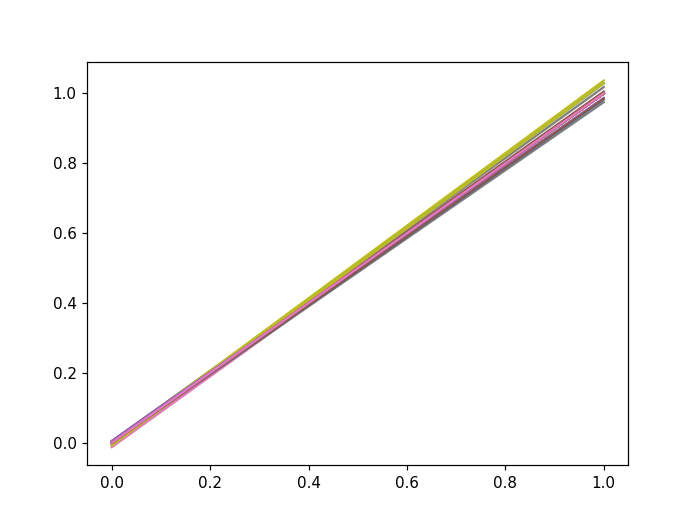

In [94]:
plt.figure()
for ii in range(model.x_knots.shape[0]):
    plt.plot(model.x_knots[ii], model.y_knots[ii])

<IPython.core.display.Javascript object>


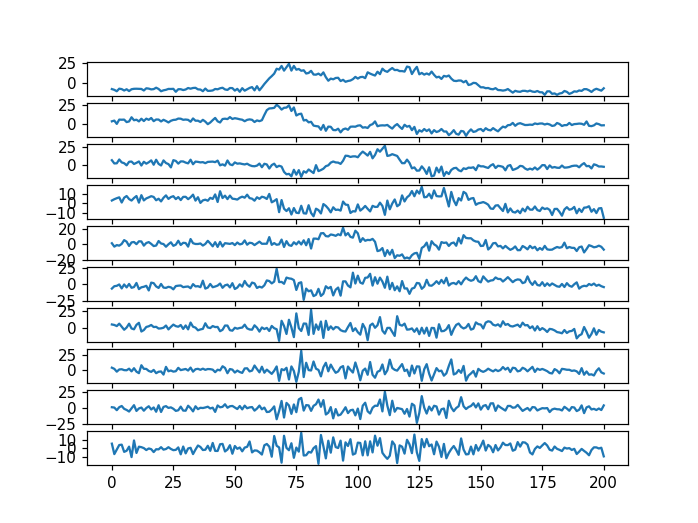

In [17]:
%matplotlib notebook

shp = alignedDat['b'].shape
# shp = dat['neuralActivityCube_b'].shape
arr_2d = np.reshape(alignedDat['b'].transpose(1,2,0), (shp[1], shp[0]*shp[2]))
# arr_2d = np.reshape(dat['neuralActivityCube_b'].transpose(1,2,0), (shp[1], shp[0]*shp[2]))


import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=10)
test = pca.fit_transform(arr_2d)

fig, axs = plt.subplots(test.shape[1])

for ii in range(len(axs)):
    axs[ii].plot(test[:,ii])